<div style ="text-align:center;font-size:28px;color:Blue">**Name: Jasti Bhavana Sai **</div>

<div style ="text-align:center;font-size:25px;color:Red">**GRIP - The Spark Foundation**</div>

<div style ="text-align:center;font-size:20px;color:Green">**Domain - Data Science & Business Analytics**</div>

<div style ="text-align:center;font-size:18px;color:Black">**Normal Task Exploratory Data Analysis - Terrorism**</div>

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly_express as px
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Load the dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')

In [4]:
# Print the first five rows of dataset
df.head(5) 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Print the last five rows of dataset
df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
# Checking the shape of the dataset
df.shape

(181691, 135)

In [7]:
# Checking the columns in the dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
# Creating copy of original data
copy_df = df.copy()
data = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'success', 'suicide', 
         'nwound', 'nkill', 'attacktype1_txt','targtype1_txt', 'gname','natlty1_txt','weaptype1_txt']]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,success,suicide,nwound,nkill,attacktype1_txt,targtype1_txt,gname,natlty1_txt,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary


In [9]:
# Renaming the columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                     'provstate':'State', 'city':'City', 'success':'Success', 'suicide':'Suicide', 'nwound':'Wound',
                     'nkill':'Kill','attacktype1_txt':'Attack', 'targtype1_txt':'Target','gname':'Group',
                     'natlty1_txt':'Nationality','weaptype1_txt':'Weapon'},inplace=True)
data.head()

,Year,Month,Day,Country,Region,State,City,Success,Suicide,Wound,Kill,Attack,Target,Group,Nationality,Weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,0.0,1.0,Assassination,Private Citizens & Property,MANO-D,Dominican Republic,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Belgium,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,0.0,1.0,Assassination,Journalists & Media,Unknown,United States,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,United States,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,United States,Incendiary


In [10]:
# Checking the null values
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Success            0
Suicide            0
Wound          16311
Kill           10313
Attack             0
Target             0
Group              0
Nationality     1559
Weapon             0
dtype: int64

In [11]:
#Filling the null values with respective values.
data.Kill.fillna(data.Kill.mode()[0],inplace=True)
data.Wound.fillna(data.Wound.mode()[0],inplace=True)

In [12]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State           421
City            434
Success           0
Suicide           0
Wound             0
Kill              0
Attack            0
Target            0
Group             0
Nationality    1559
Weapon            0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
State          0
City           0
Success        0
Suicide        0
Wound          0
Kill           0
Attack         0
Target         0
Group          0
Nationality    0
Weapon         0
dtype: int64

In [15]:
# Changing the years into decade
data['Decade'] = pd.cut(data['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020],
                        labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])

## ***Observations from Visualizations***

### Year of Higher attack

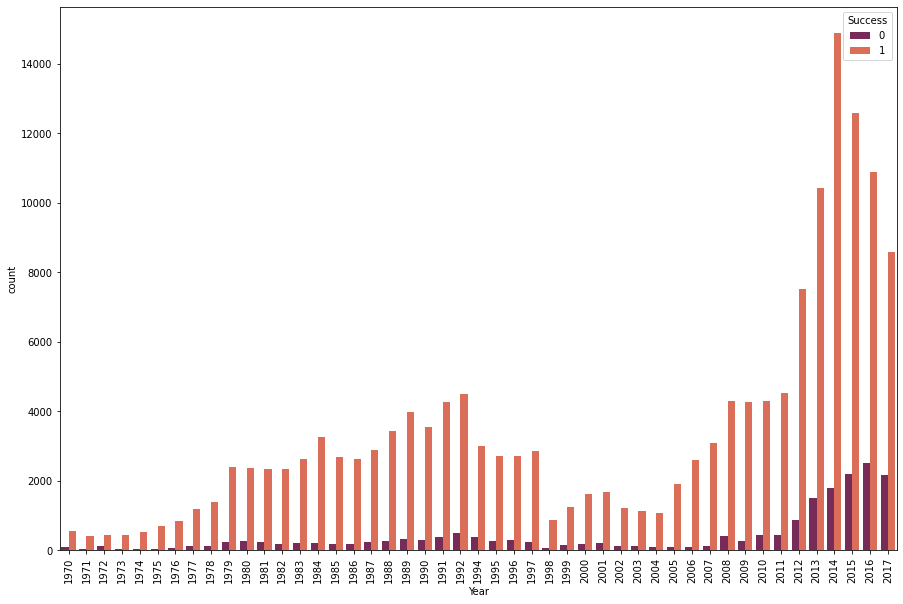

In [16]:
# Year of Higher attack
plt.figure(figsize=[15,10])
sns.countplot('Year',data=data,hue='Success', palette='rocket')
plt.xticks(rotation=90)
plt.show()

***2014 is the year with highest attacks**


### Decade wise terrorist attacks

In [17]:
#Decade wise analysis.
data[['Year','Decade']].sample(10)

,Year,Decade
25133,1985,1980-1990
21913,1984,1980-1990
46090,1991,1990-2000
167955,2016,2010-2017
175069,2017,2010-2017
114531,2013,2010-2017
133789,2014,2010-2017
5973,1978,1970-1980
19227,1983,1980-1990
41891,1990,1980-1990


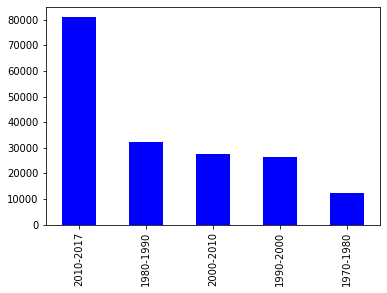

In [18]:
# Decade with higher attacks.
Decade = data['Decade'].value_counts()
Decade.plot.bar(color='Blue');

***Most of the attacks were happend in the recent years 2010-2017**

### Region wise terrorist attacks


In [19]:
# No of terrorist attacks in regions
region_count=data['Region'].value_counts()
regions=data['Region'].value_counts().index
px.bar(data,x=regions,y=region_count, barmode='group',title='No of terrorist attacks in regions.')

***Middle East & North Africa has the highest number attacks than other regions**

### Top 10 Countries that are mostly attacked by terrorists.

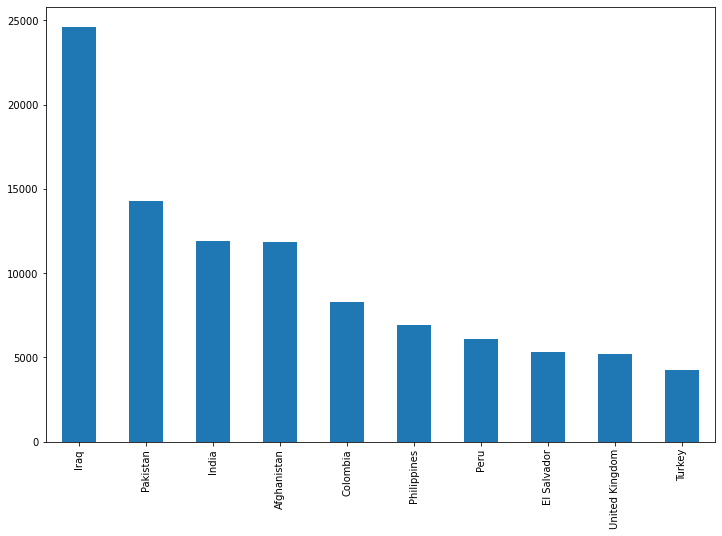

In [20]:
# Country with most number of attacks.
plt.figure(figsize=[12,8])
country = data['Country'].value_counts()[:10]
country.plot.bar();

***Iraq is the country with highest record in terrorism activities**

### Weapons used by terrorists

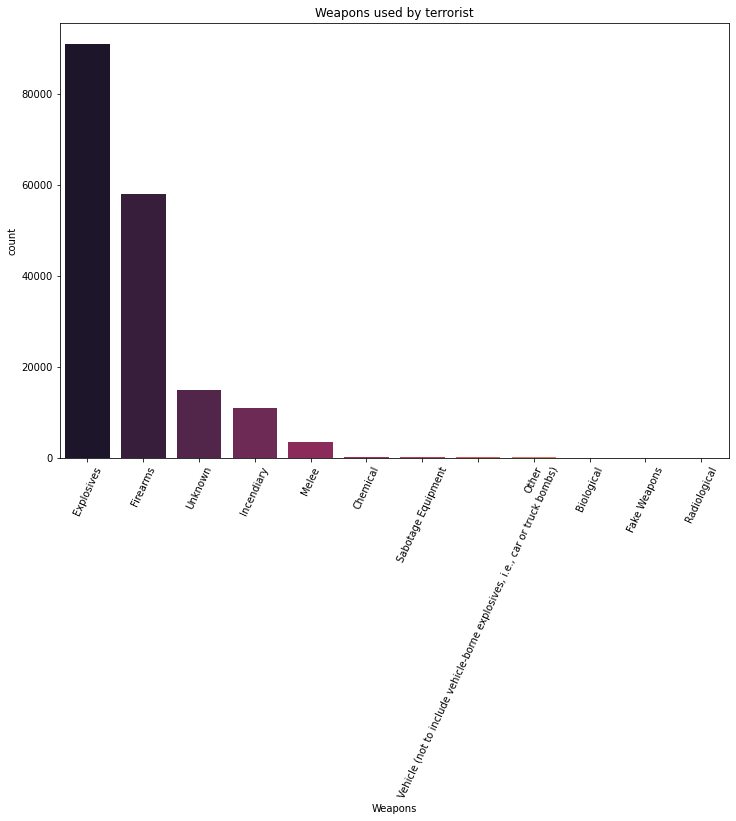

In [21]:
plt.figure(figsize=[12,8])
sns.countplot('Weapon',data=data,order=data['Weapon'].value_counts().index, palette='rocket')
plt.xticks(rotation=65)
plt.xlabel('Weapons')
plt.title('Weapons used by terrorist')
plt.show()

***Most used weapons of terrorist is Explosives**

### Target of terrorists

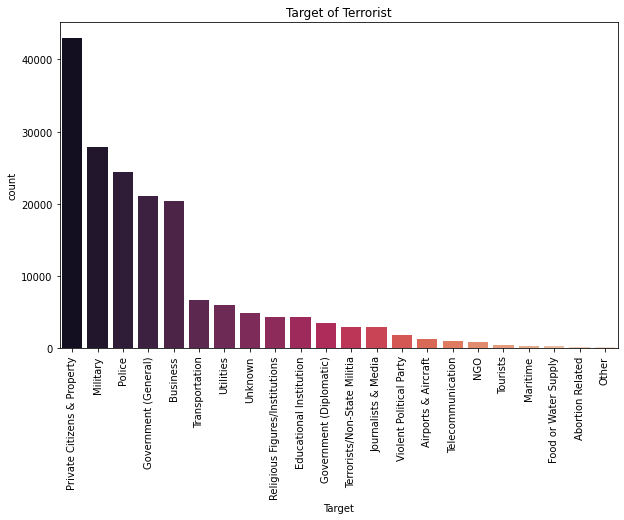

In [22]:
plt.figure(figsize=[10,6])
sns.countplot('Target',data=data,palette='rocket',order=data['Target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target')
plt.title('Target of Terrorist')
plt.show()

***Private Citizens & Property are the main target of terrorists.**


### Success rate of attacks

In [23]:
Success= data['Success'].value_counts()
Success

1    159869
0     19414
Name: Success, dtype: int64

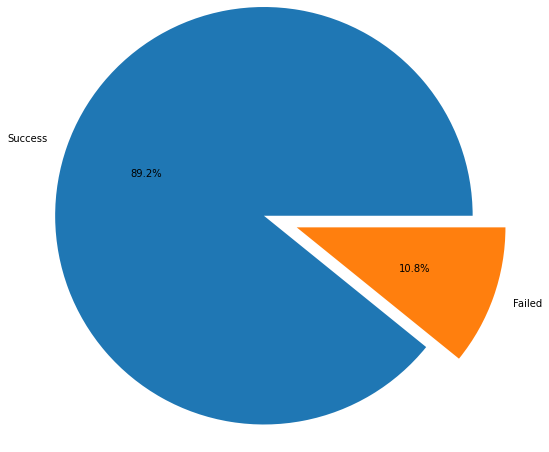

In [24]:
plt.figure(figsize=(8,8))
plt.pie(Success,labels=['Success','Failed'],explode = (0.20, 0),autopct='%1.1f%%',radius=1.2);

***89% of attacks were successfull where remaining 11% got failed.**

### Terrorism in India

In [25]:
# Data of terrorism attack happend in India
india = data[data['Country']=='India']
india.head()

,Year,Month,Day,Country,Region,State,City,Success,Suicide,Wound,Kill,Attack,Target,Group,Nationality,Weapon,Decade
1186,1972,2,22,India,South Asia,Delhi,New Delhi,1,0,0.0,0.0,Hijacking,Airports & Aircraft,Palestinians,Germany,Explosives,1970-1980
2764,1975,1,2,India,South Asia,Bihar,Samastipur,1,0,0.0,4.0,Bombing/Explosion,Government (General),Ananda Marga,India,Explosives,1970-1980
3857,1976,5,26,India,South Asia,Delhi,New Delhi,1,0,0.0,0.0,Bombing/Explosion,Airports & Aircraft,Unknown,India,Explosives,1970-1980
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,1,0,0.0,0.0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Japan,Firearms,1970-1980
7337,1979,1,13,India,South Asia,Assam,Unknown,1,0,0.0,0.0,Armed Assault,Police,Naga People,India,Firearms,1970-1980


In [26]:
# Total number of Terrorism attacks in India
vc = india.value_counts().sum()
print('Total number of Terrorism attacks in India is', vc)

Total number of Terrorism attacks in India is 11934


In [27]:
# States in India.
india.State.unique()

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Unknown', 'Jharkhand', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh', 'Tripura',
       'Haryana', 'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana'], dtype=object)

In [28]:
# State with maximum number of attacks record.
mstate=india.State.max()
print(mstate, 'is the state with maximum number of terrorism attacks in India.')

West Bengal is the state with maximum number of terrorism attacks in India.


In [29]:
# State with minimum number of attacks record.
mnstate=india.State.min()
print(mnstate, 'is the state with minimum number of terrorism attacks in India.')

Andhra Pradesh is the state with minimum number of terrorism attacks in India.


In [30]:
ikill=india.Kill.sum()
print(ikill,'people were killed in India')

19232.0 people were killed in India


In [31]:
iwound=india.Wound.sum()
print(iwound,'people were wounded in India')

28891.0 people were wounded in India


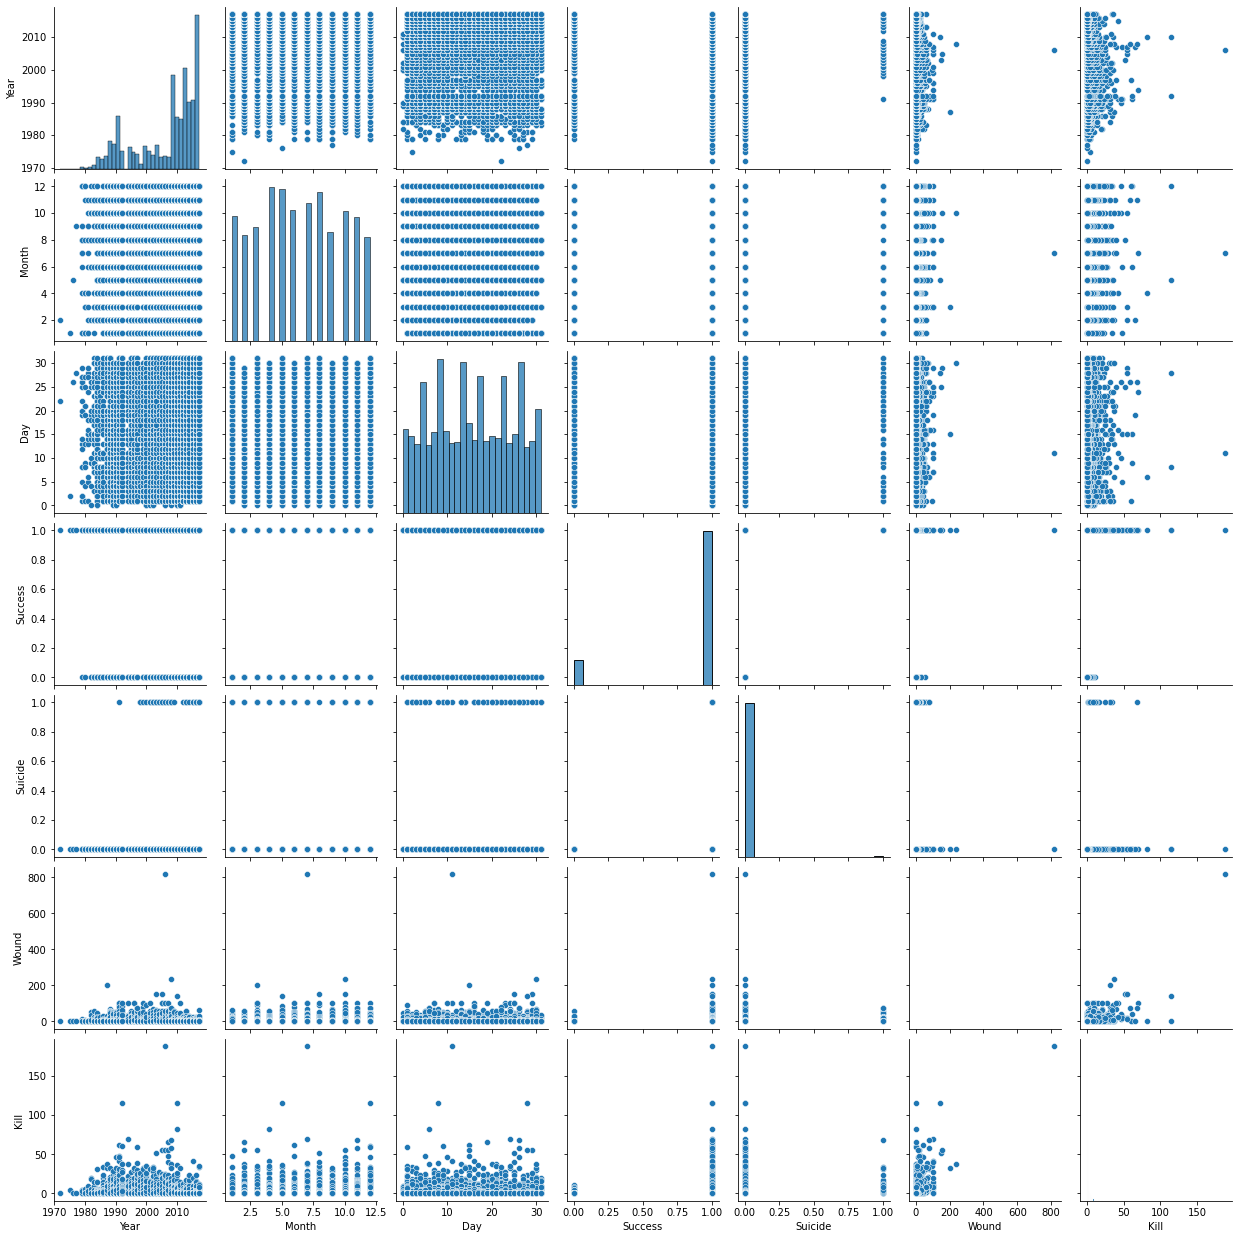

In [32]:
sns.pairplot(india);

In [33]:
px.scatter_matrix(india, title='Terrorism records in India',dimensions=["Year", "Success", "Wound", "Kill"],color='State')

### Terrorism in Iraq

In [34]:
# Data of terrorism attack happend in Iraq
iraq = data[data['Country']=='Iraq']
iraq.head()

,Year,Month,Day,Country,Region,State,City,Success,Suicide,Wound,Kill,Attack,Target,Group,Nationality,Weapon,Decade
2854,1975,3,1,Iraq,Middle East & North Africa,Nineveh,Mosul,1,0,1.0,0.0,Hijacking,Airports & Aircraft,Unknown,Iraq,Unknown,1970-1980
4385,1976,12,15,Iraq,Middle East & North Africa,Baghdad,Baghdad,1,0,285.0,10.0,Bombing/Explosion,Airports & Aircraft,Unknown,Iraq,Explosives,1970-1980
4393,1976,12,18,Iraq,Middle East & North Africa,Unknown,Penjwon,1,0,0.0,0.0,Hostage Taking (Kidnapping),Government (General),Kurdish Democratic Party-Iraq (KDP),Poland,Unknown,1970-1980
4402,1976,12,24,Iraq,Middle East & North Africa,Baghdad,Baghdad,1,0,0.0,2.0,Assassination,Violent Political Party,Unknown,West Bank and Gaza Strip,Firearms,1970-1980
8688,1979,6,15,Iraq,Middle East & North Africa,Basra,Basra,1,0,0.0,1.0,Assassination,Government (General),Unknown,Iraq,Unknown,1970-1980


In [35]:
# Total number of Terrorism attacks in Iraq
ivc = iraq.value_counts().sum()
print('Total number of Terrorism attacks in Iraq is', ivc)

Total number of Terrorism attacks in Iraq is 24591


In [36]:
# States in Iraq.
iraq.State.unique()

array(['Nineveh', 'Baghdad', 'Unknown', 'Basra', 'At Tamim',
       'Sulaymaniyah', 'Kirkuk', 'Dihok', 'Saladin', 'Arbil', 'Diyala',
       'Maysan', 'Dhi Qar', 'Al Anbar', 'Muthanna', 'Karbala', 'Wasit',
       'Najaf', 'Babil', 'Qadisiyah', 'Kunar', 'Khost', 'Al Qadisiyah',
       'NIneveh', 'unknown'], dtype=object)

In [37]:
# State with maximum number of attacks record.
imstate=iraq.State.max()
print(imstate, 'is the state with maximum number of terrorism attacks in Iraq.')

unknown is the state with maximum number of terrorism attacks in Iraq.


In [38]:
# State with minimum number of attacks record.
imnstate=iraq.State.min()
print(imnstate, 'is the state with minimum number of terrorism attacks in Iraq.')

Al Anbar is the state with minimum number of terrorism attacks in Iraq.


In [39]:
iqkill=iraq.Kill.sum()
print(iqkill,'people were killed in Iraq')

78475.0 people were killed in Iraq


In [40]:
iqwound=iraq.Wound.sum()
print(iqwound,'people were wounded in Iraq')

134461.0 people were wounded in Iraq


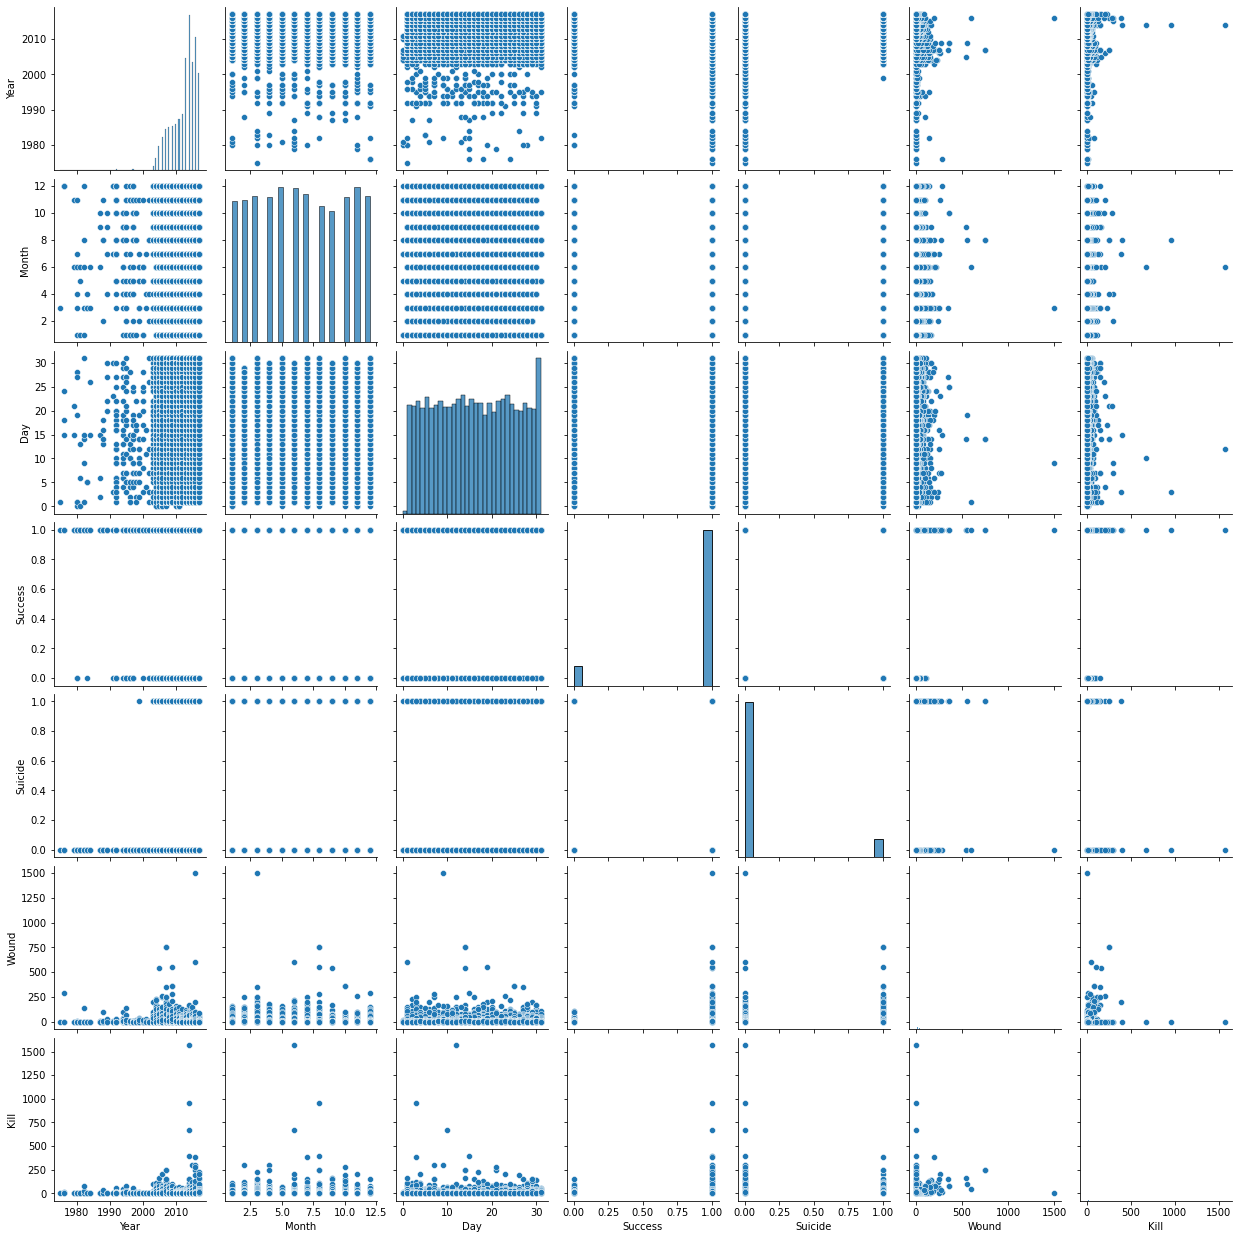

In [41]:
sns.pairplot(iraq);

In [42]:
px.scatter_matrix(iraq, title='Terrorism records in Iraq',dimensions=["Year", "Success", "Wound", "Kill"],color='State')